In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_pickle(r'C:\Users\Almog\Desktop\Data Science\Projects\Bank Marketing Project\Pickle files\Feature_selection_bm.pkl')
df

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_success,education_encoded,default_encoded,housing_encoded
0,56,1,-1,0,1.1,93.994,-36.4,4.857,5191,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,0,0
1,57,1,-1,0,1.1,93.994,-36.4,4.857,5191,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,-1,0
2,37,1,-1,0,1.1,93.994,-36.4,4.857,5191,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0,1
3,40,1,-1,0,1.1,93.994,-36.4,4.857,5191,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,0,0
4,56,1,-1,0,1.1,93.994,-36.4,4.857,5191,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,-1,0,-1.1,94.767,-50.8,1.028,4964,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,0,1
41184,46,1,-1,0,-1.1,94.767,-50.8,1.028,4964,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,0,0
41185,56,2,-1,0,-1.1,94.767,-50.8,1.028,4964,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0,1
41186,44,1,-1,0,-1.1,94.767,-50.8,1.028,4964,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,0,0


In [3]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_success,education_encoded,default_encoded,housing_encoded
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,-0.741988,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.019010,0.112654,...,0.017432,0.013839,0.206711,0.209357,0.196416,0.197485,0.033335,5.280252,-0.208653,0.499806
std,10.42125,2.770014,1.510327,0.494901,1.570960,0.578840,4.628198,1.734447,72.178074,0.316173,...,0.130877,0.116824,0.404951,0.406855,0.397292,0.398106,0.179512,1.702238,0.406530,0.545967
min,17.00000,1.000000,-1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4964.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,-1.000000
25%,32.00000,1.000000,-1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
50%,38.00000,2.000000,-1.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000
75%,47.00000,3.000000,-1.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000
max,98.00000,56.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000


### Dividing the df into train, valid and test:

In [5]:
# Define X (features) and y (target)
X = df.drop('y', axis=1)  # Replace 'target_column' with your actual target column name
y = df['y']
# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


### Defining the visualization for each model I will train:

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reduce to 2D for Visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Function to Plot Decision Boundaries
def plot_decision_boundary(model, X, y, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)  # cmap for better color contrast
    
    # Plot points with color map for "Yes" (1) and "No" (0)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    
    # Add a colorbar with labels for 0 and 1 classes
    cbar = plt.colorbar(scatter)
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(['No', 'Yes'])
    
    plt.title(title)
    plt.show()

#### Logistic Regression

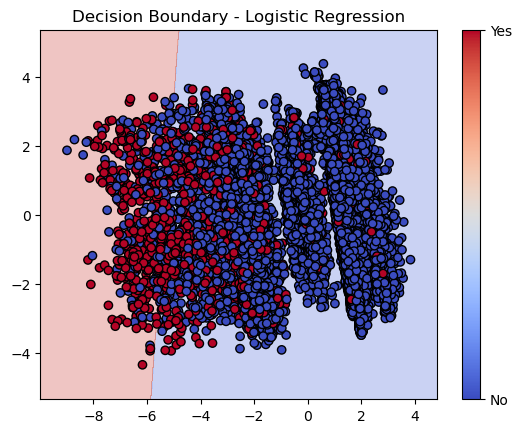

In [9]:

log_reg = LogisticRegression()
log_reg.fit(X_train_pca, y_train)

# Plot Decision Boundary for Logistic Regression
plot_decision_boundary(log_reg, X_train_pca, y_train, "Decision Boundary - Logistic Regression")

#### SVM

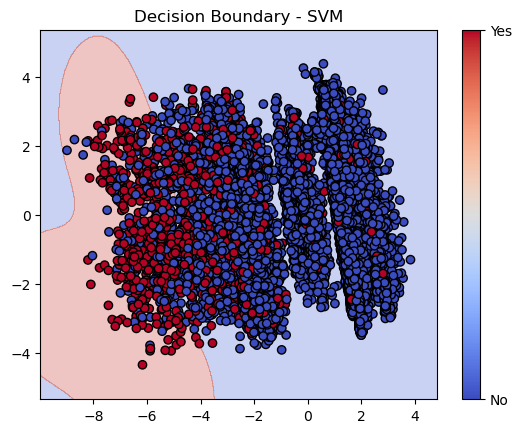

In [11]:
svm = SVC(probability=True)
svm.fit(X_train_pca, y_train)

# Plot Decision Boundary for SVM
plot_decision_boundary(svm, X_train_pca, y_train, "Decision Boundary - SVM")

#### Random Forest

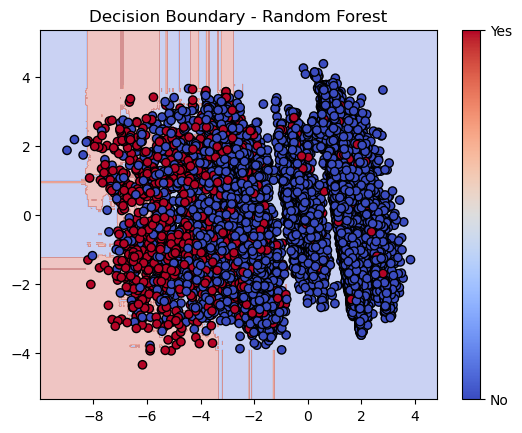

In [13]:
rf = RandomForestClassifier()
rf.fit(X_train_pca, y_train)

# Plot Decision Boundary for Random Forest
plot_decision_boundary(rf, X_train_pca, y_train, "Decision Boundary - Random Forest")

#### Gradient Boosting

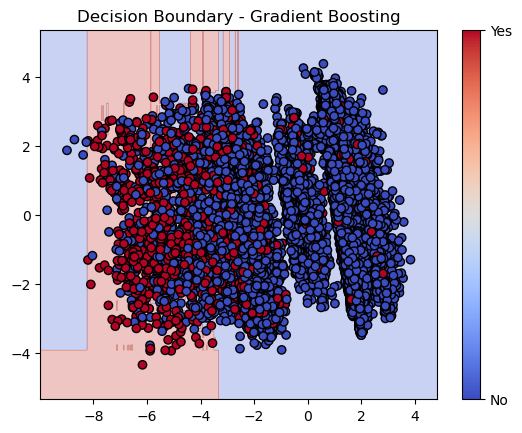

In [24]:
gb = GradientBoostingClassifier()
gb.fit(X_train_pca, y_train)

# Plot Decision Boundary for Gradient Boosting
plot_decision_boundary(gb, X_train_pca, y_train, "Decision Boundary - Gradient Boosting")

#### K-Nearest Neighbors

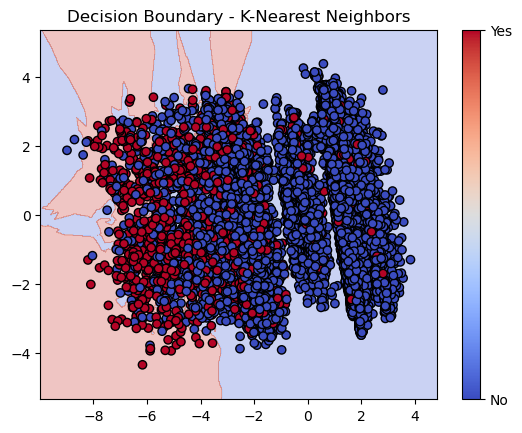

In [45]:
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)

# Plot Decision Boundary for K-Nearest Neighbors
plot_decision_boundary(knn, X_train_pca, y_train, "Decision Boundary - K-Nearest Neighbors")

#### XGBoost

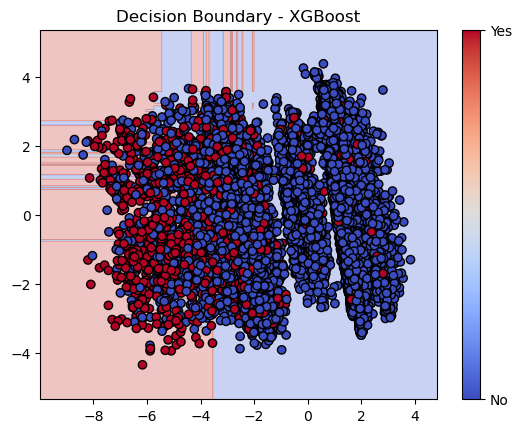

In [47]:
xgb = XGBClassifier()
xgb.fit(X_train_pca, y_train)

# Plot Decision Boundary for XGBoost
plot_decision_boundary(xgb, X_train_pca, y_train, "Decision Boundary - XGBoost")

### Metrics Comparison

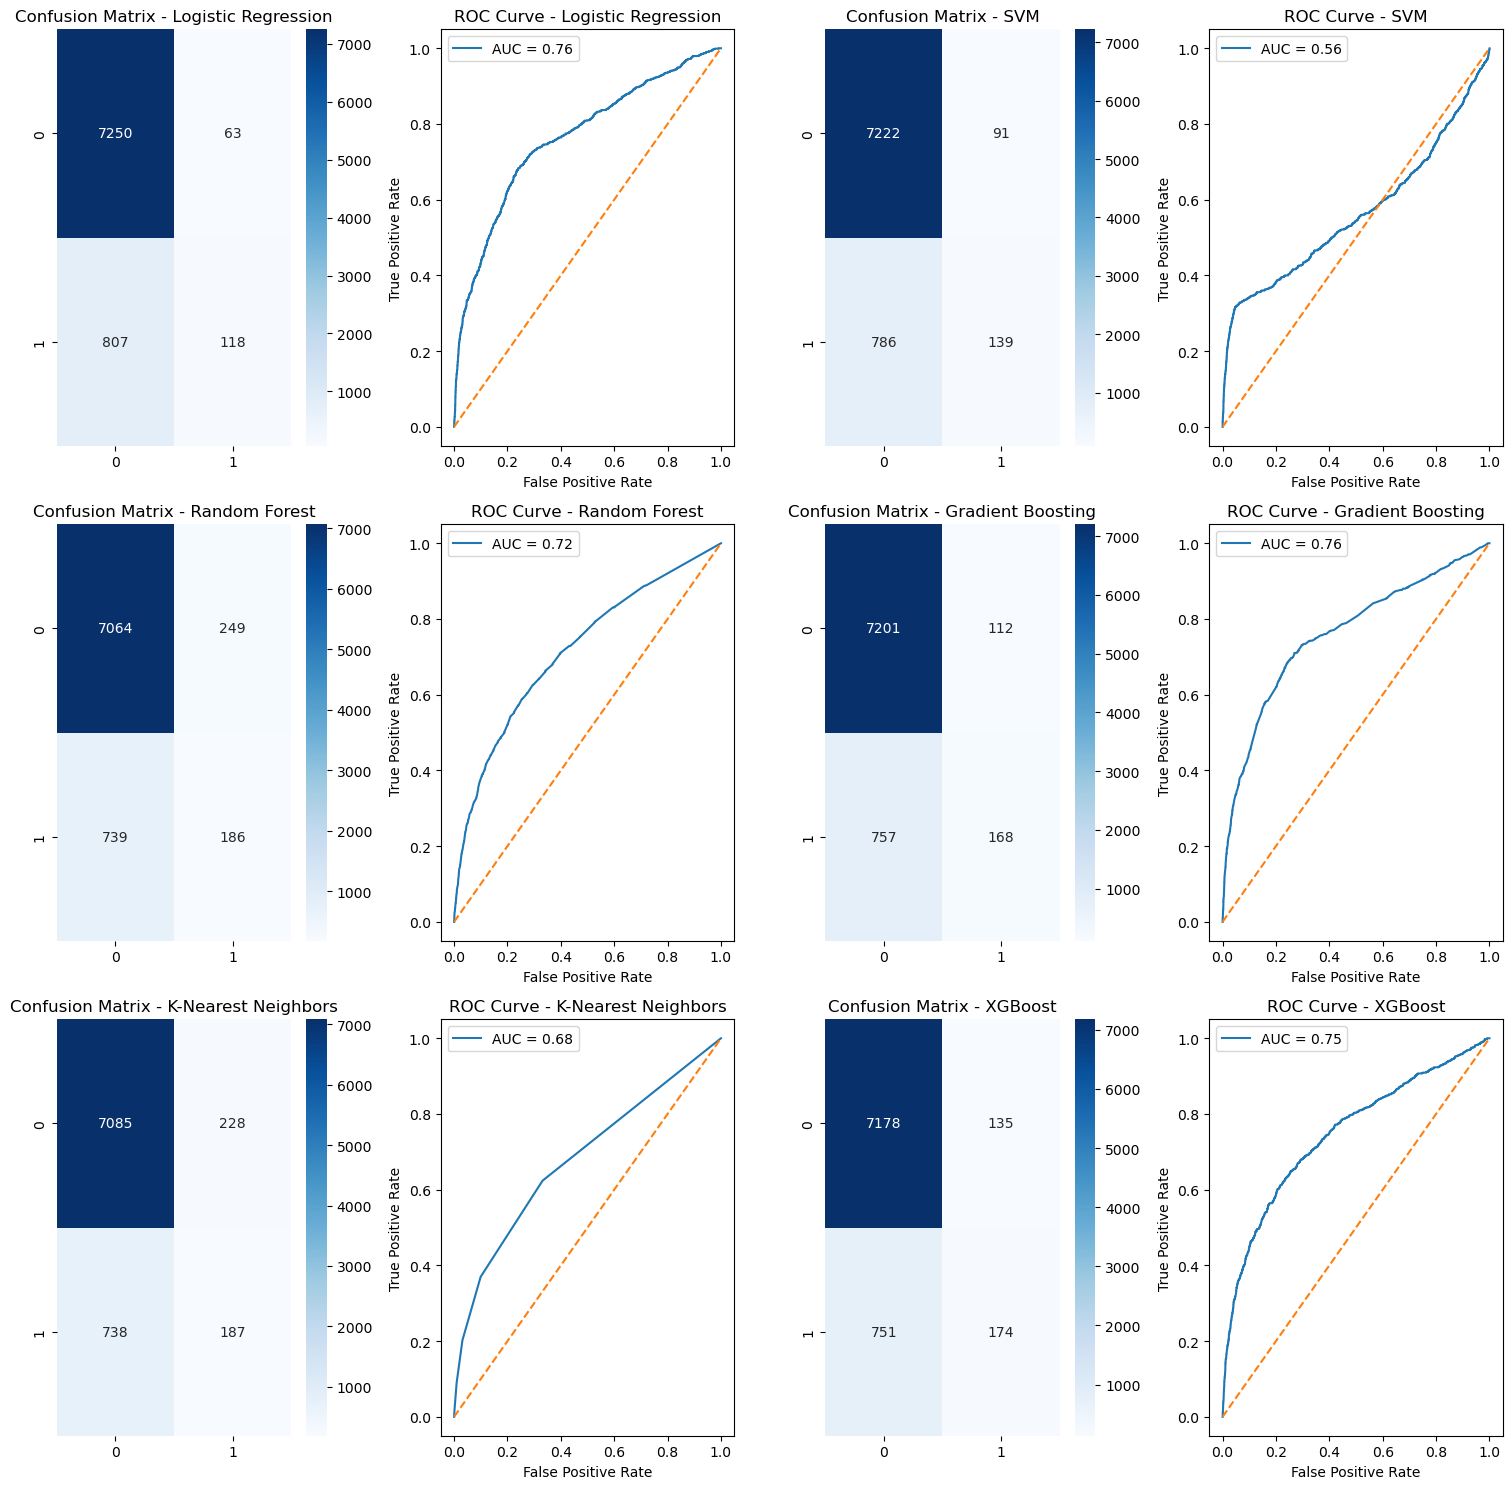

In [49]:
# List of models (same as before)
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

trained_models = {}

# Determine number of rows needed (2 models per row)
num_models = len(models)
num_rows = (num_models + 1) // 2  # Ceiling division to account for odd number of models

# Create figure with a larger size to accommodate subplots
plt.figure(figsize=(15, 5 * num_rows))

# Loop through each model, make predictions, and evaluate
for i, (name, model) in enumerate(models.items()):
    # Train the model
    model.fit(X_train_pca, y_train)
    trained_models[name] = model
    
    # Make predictions
    y_pred = model.predict(X_test_pca)
    y_prob = model.predict_proba(X_test_pca)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_pca)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(num_rows, 4, i * 2 + 1)  # Adjusting to place two models per row (4 columns per row)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    plt.subplot(num_rows, 4, i * 2 + 2)  # Adjusting to place two models per row (4 columns per row)
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend()

# Show all plots at once
plt.tight_layout()
plt.show()


#### Summary table

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Initialize models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}


# Initialize a dictionary to store trained models
trained_models = {}

# Initialize a list to store the summary table data
summary_data = []

# Loop through each model, calculate metrics, and store them in summary_data
for name, model in models.items():
    # Train the model
    model.fit(X_train_pca, y_train)
    trained_models[name] = model
    
    # Make predictions
    y_pred = model.predict(X_test_pca)
    y_prob = model.predict_proba(X_test_pca)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_pca)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    TP, FP, TN, FN = cm.ravel()  # Extract True Positives, False Positives, True Negatives, False Negatives
    
    # ROC Curve and AUC score
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    
    # Append data for the current model
    summary_data.append({
        'Model': name,
        'TP': TP,
        'FP': FP,
        'TN': TN,
        'FN': FN,
        'AUC': auc_score
    })

# Create a DataFrame for the summary table
summary_df = pd.DataFrame(summary_data)

# Display the summary DataFrame
summary_df


,Model,TP,FP,TN,FN,AUC
0,Logistic Regression,7250,63,807,118,0.763169
1,SVM,7222,91,786,139,0.564426
2,Random Forest,7058,255,737,188,0.711482
3,Gradient Boosting,7201,112,757,168,0.760751
4,K-Nearest Neighbors,7085,228,738,187,0.681179
5,XGBoost,7178,135,751,174,0.747014


#### Accurecy Score 

In [74]:
from sklearn.metrics import accuracy_score

# Initialize a dictionary to store accuracy results
accuracy_results = []

# Iterate through each model in the dictionary
for name, model in models.items():
    # Train the model
    model.fit(X_train_pca, y_train)
    
    # Make predictions on the test set
    y_pred_test = model.predict(X_test_pca)
    
    # Calculate accuracy
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Append the results for the current model
    accuracy_results.append({
        'Model': name,
        'Test Accuracy': test_accuracy
    })

# Create a DataFrame to display the summary
accuracy_df = pd.DataFrame(accuracy_results)

# Print the summary table
print("\nModel Accuracy Summary:")
accuracy_df


Model Accuracy Summary:


,Model,Test Accuracy
0,Logistic Regression,0.894392
1,SVM,0.893542
2,Random Forest,0.880918
3,Gradient Boosting,0.894513
4,K-Nearest Neighbors,0.882739
5,XGBoost,0.892450


##### The chosen model is Logistic Regression due to the following reasons:
##### 1. Highest True Positives (TP) – Logistic Regression correctly predicts 7,250 positive cases, which is the highest among all models.

##### 2. Lowest False Positives (FP) and False Negatives (FN) – It makes the fewest mistakes in misclassifying both positive and negative cases.

##### 3. Competitive AUC Score (0.763) – It still has one of the best AUC scores, meaning it effectively ranks predictions.

##### 4. Test Accuracy (0.8944) – It’s slightly lower than Gradient Boosting (0.8945), but the difference is negligible. Since accuracy is not the only deciding factor, the higher TP count still makes Logistic Regression the best fit.

### Fine Tunning - Logistic Regression

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters: {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}
Best Score: 0.8942214003705373


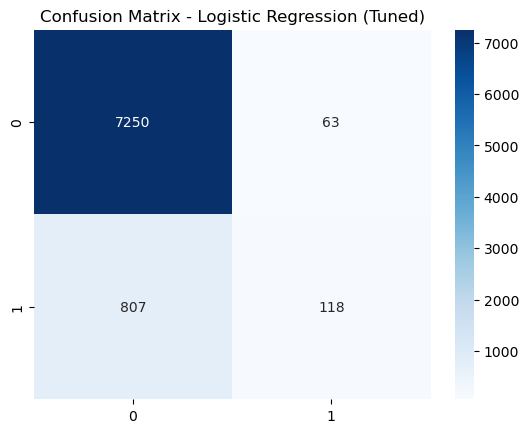

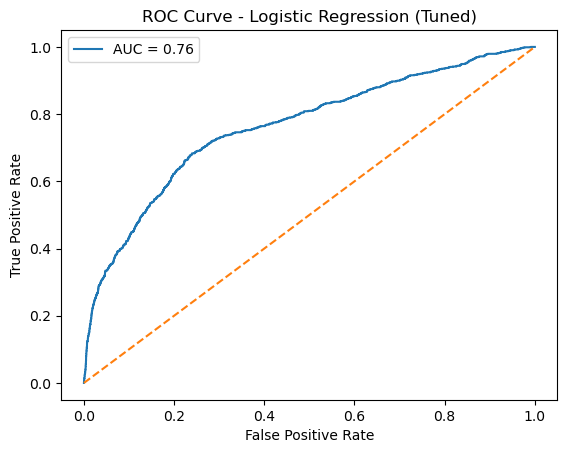

In [36]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'newton-cg', 'lbfgs'],  # Optimization algorithm
    'max_iter': [100, 200, 300],  # Number of iterations for the solver
}

# Initialize the logistic regression model
logreg = LogisticRegression()

# Setup the grid search
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit grid search to the training data
grid_search.fit(X_train_pca, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model
best_logreg = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_logreg.predict(X_test_pca)
y_prob = best_logreg.predict_proba(X_test_pca)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression (Tuned)")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (Tuned)")
plt.legend()
plt.show()


#### The best hyperparameters for the model are: 
#####  C = 1
##### max_iter = 100
##### solver = liblinear

### Model Evaluation on the validation set:

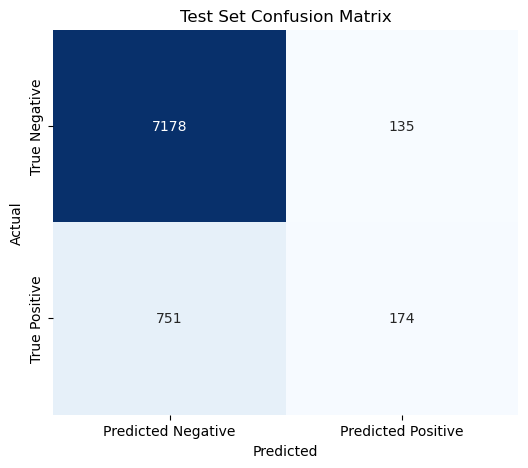

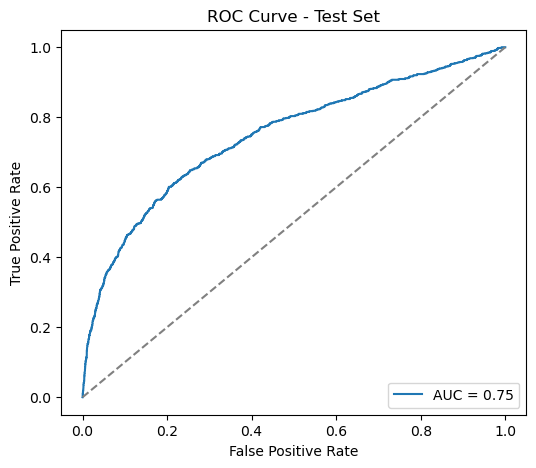

In [59]:
# Generate predictions for the test set
y_pred_test = model.predict(X_test_pca)

# Generate probabilities or decision scores for ROC Curve
y_test_prob = model.predict_proba(X_test_pca)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_pca)

# Generate Confusion Matrix for the Test Set
test_cm = confusion_matrix(y_test, y_pred_test)

# Plotting Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['True Negative', 'True Positive'])
plt.title('Test Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')  # Diagonal line for reference
plt.title('ROC Curve - Test Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [63]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for the test set
test_accuracy = accuracy_score(y_test, y_pred_test)

# Assign the AUC score to test_auc (from the ROC Curve step)
test_auc = roc_auc  # Use the AUC score calculated earlier

# Summary: Model Performance on Test Set
print("\nModel Performance Summary on Test Set:")
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set ROC AUC Score: {test_auc:.4f}")
print(f"Test Set Confusion Matrix:\n{test_cm}")


Model Performance Summary on Test Set:
Test Set Accuracy: 0.8924
Test Set ROC AUC Score: 0.7470
Test Set Confusion Matrix:
[[7178  135]
 [ 751  174]]


##### Logistic rigression classify if the customer will subscribe or not subscribe correctly 89.24% of the time. 

#### Feature importance 
##### Although Logistic Regression was selected as the best model for prediction, I also used XGBoost to visualize feature importance due to its robust ability to handle complex data relationships and provide insights into which features most influence the model's decision-making process.

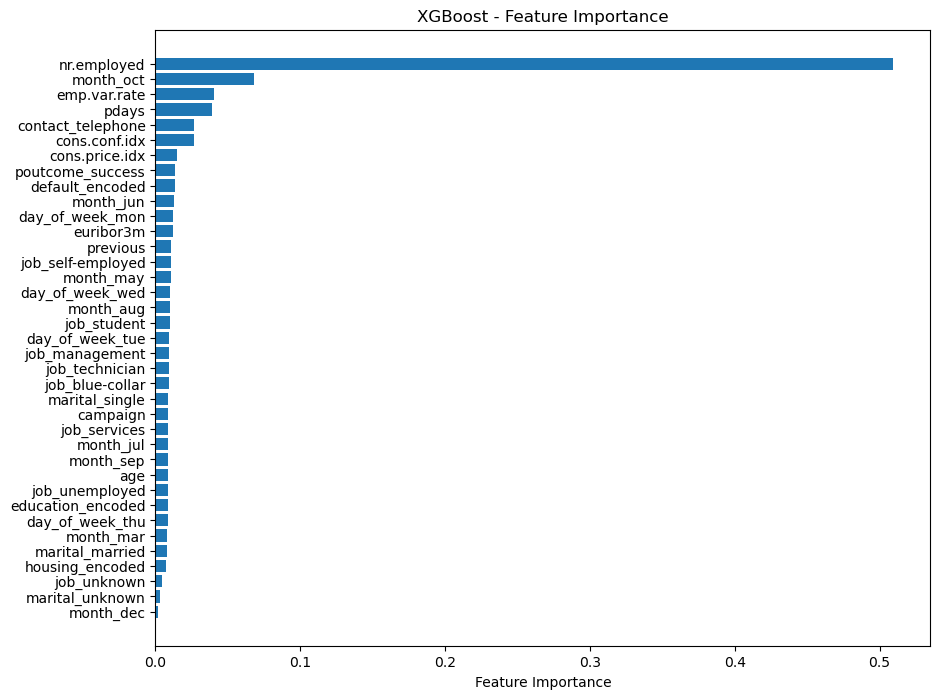

In [71]:
# Train XGBoost model for feature importance visualization
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Get feature importance from the XGBoost model
feature_importance = xgb_model.feature_importances_

# Sort feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost - Feature Importance")
plt.gca().invert_yaxis()  # To display the most important features on top
plt.show()


##### It seems like the number of employees per quarter has a significant importance. I believe because the service managed via phone calls, the number of employees that could perform the calls is one of the keys for the success of the campaign.